# MLP assignment

In [72]:
#importing libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


In [73]:
# creating a binary dataset from sklearn we can also use make_classifcation
X,y=make_regression( n_samples=200,n_features=2,noise=15,random_state=42)

In [74]:
#shape of X
X.shape

(200, 2)

In [75]:
#shape of y
y.shape

(200,)

In [76]:
# Reshape target
y = y.reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Activation Function

In [77]:
#sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [78]:
#sigmoid derivative (as diffrentiation of sigmoid is sigmoid(1-sigmoid))
def sigmoid_derivative(a):
    return a * (1 - a)

# Initialize Network Parameters

In [79]:
np.random.seed(42)

input_size = X_train.shape[1]   # 2
hidden_size = 10
output_size = 1

W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))


# Loss Function (MSE)


In [80]:
def compute_loss(y, y_hat):
    return np.mean((y - y_hat) ** 2)


# Backpropagation

In [81]:
def backward_propagation(X, y, a1, y_hat, W2):
    m = X.shape[0]

    dz2 = (y_hat - y) * sigmoid_derivative(y_hat)
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m

    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2


# Training Loop

In [82]:
learning_rate = 0.05
epochs = 3000
losses = []

for epoch in range(epochs):

    # Forward propagation
    z1 = np.dot(X_train, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    y_hat = sigmoid(z2)

    # Loss
    loss = compute_loss(y_train, y_hat)
    losses.append(loss)

    # Backpropagation
    dW1, db1, dW2, db2 = backward_propagation(
        X_train, y_train, a1, y_hat, W2
    )

    # Update weights
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 2207.7070
Epoch 500, Loss: 2171.9270
Epoch 1000, Loss: 2171.7087
Epoch 1500, Loss: 2171.6030
Epoch 2000, Loss: 2171.5328
Epoch 2500, Loss: 2171.4802


# Visualize Loss vs Epochs

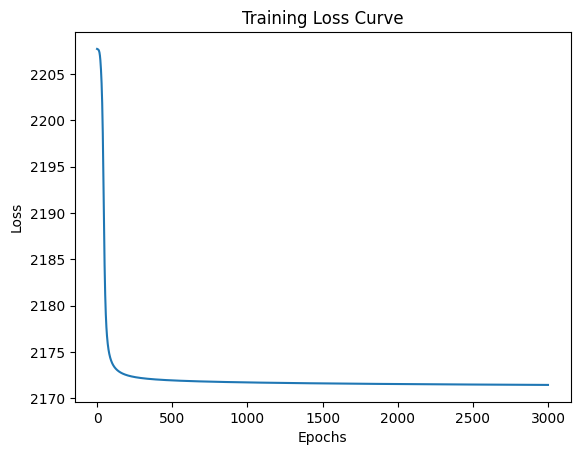

In [83]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


#Test the Model

In [84]:
def predict(X):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    return sigmoid(z2)

y_pred = predict(X_test)

print("Sample predictions:")
print(y_pred[:5])


Sample predictions:
[[9.99999968e-01]
 [6.95272033e-07]
 [1.56434215e-02]
 [1.84217140e-06]
 [7.14081554e-07]]


# Plot Sigmoid Activation Function

The sigmoid activation function squashes input values between 0 and 1 and introduces non-linearity. Its derivative is used during backpropagation to compute gradients

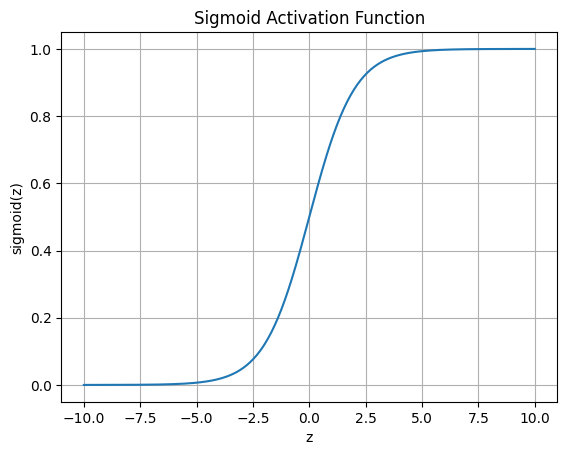

In [85]:

z = np.linspace(-10, 10, 400)
plt.figure()
plt.plot(z, sigmoid(z))
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.title("Sigmoid Activation Function")
plt.grid(True)
plt.show()


# Plot Sigmoid Derivative

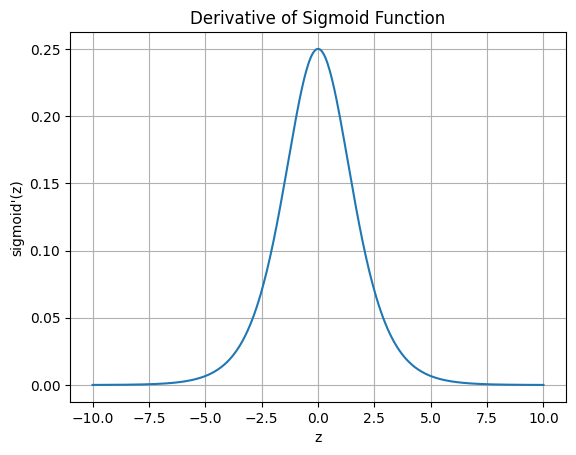

In [86]:
def sigmoid_derivative(a):
    return a * (1 - a)

plt.figure()
plt.plot(z, sigmoid_derivative(sigmoid(z)))
plt.xlabel("z")
plt.ylabel("sigmoid'(z)")
plt.title("Derivative of Sigmoid Function")
plt.grid(True)
plt.show()


# Plot loss landscape by varying weights

The loss landscape shows how the loss function behaves with respect to changes in weights. Gradient descent updates weights by moving towards regions of lower loss on this surface

In [87]:
# Choose weight to vary
w_values = np.linspace(-2, 2, 100)
loss_values = []

# Save original weight
original_w = W1[0, 0]

for w in w_values:
    W1[0, 0] = w   # vary one weight

    # Forward pass
    z1 = np.dot(X_train, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    y_hat = sigmoid(z2)

    loss = compute_loss(y_train, y_hat)
    loss_values.append(loss)

# Restore original weight
W1[0, 0] = original_w


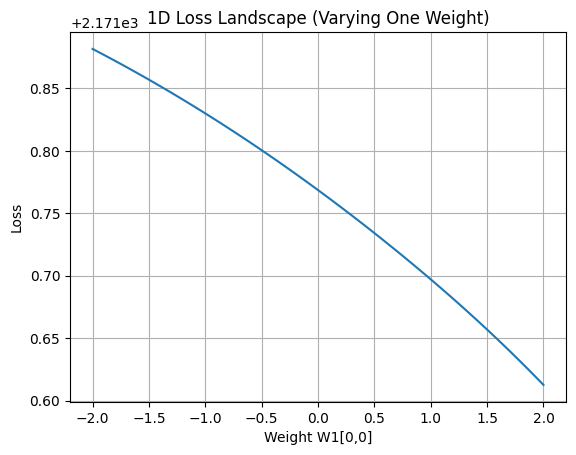

In [88]:
plt.figure()
plt.plot(w_values, loss_values)
plt.xlabel("Weight W1[0,0]")
plt.ylabel("Loss")
plt.title("1D Loss Landscape (Varying One Weight)")
plt.grid(True)
plt.show()
